# Анализ оттока и привлечение клиентов в банке Метанпром.  

## Материалы:

- [Презентация](https://www.dropbox.com/s/bknbvilsdm828sq/%D0%9F%D1%80%D0%B5%D0%B7%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F%20%D0%94%D0%B5%D0%B3%D1%82%D1%8F%D1%80%D1%91%D0%B2%20%D0%94.%D0%A1%2016.06.2023.pdf?dl=0)

- [Дашборд](https://public.tableau.com/app/profile/daniil.degtyarev/viz/YPDashboard2/Dashboard1)

## Описание проекта

Проект посвящен анализу оттока клиентов в региональном банке «Метанпром», расположенном в Ярославле и областных городах: Ростов Великий и Рыбинск. Цель проекта - выявить сегменты клиентов, которые склонны оставаться в банке, и дать рекомендации по привлечению клиентов из этих сегментов.

В ходе работы будет проведен исследовательский анализ данных, выделены характеристики клиентов, влияющие на их отток, разработана бизнес-метрика, связанная с ценностью клиента. С помощью этой метрики будут приоритизированы сегменты клиентов.

Также в рамках проекта будут проверены статистические гипотезы, в том числе о различии доходов между клиентами, которые ушли из банка, и теми, кто остался.

Данные для анализа представлены в виде датасета, содержащего информацию об идентификаторе пользователя, баллах кредитного скоринга, городе проживания, поле, возрасте, количестве объектов в собственности, балансе на счете, количестве используемых продуктов, наличии кредитной карты, активности клиента, заработной плате и факте оттока.

### Описание данных

Файл `bank_dataset.csv` содержит данные о клиентах банка «Метанпром».
Колонки:

- `userid` — идентификатор пользователя
- `score` — баллы кредитного скоринга
- `City` — город
- `Gender` — пол
- `Age` — возраст
- `Objects` — количество объектов в собственности
- `Balance` — баланс на счёте
- `Products` — количество продуктов, которыми пользуется клиент
- `CreditCard` — есть ли кредитная карта
- `Loyalty`  — активный клиент
- `estimated_salary` — заработная плата клиента
- `Churn` — ушёл или нет

## Ход исследования и задачи

**Предобработка данных**


- Чтение и изучение данных (info, describe)
- Привести столбцы к нижнему регистру
- Привести типы данных в соответвии со значениями (float / int + False / True)
- Проверка на явные и неявные дубликаты (по user_id)
- Проверка пропусков, определить случайные и не случайные пропуски, при возможности заполнить
- Добавление столбцов с кодировкой городов (0-1)  /  Ярославль, Ростов Великий, Рыбинск)
- Добавление столбцов с кодировкой пола (0 для женщин, 1 для мужчин)

**Исследовательский анализ данных:**

- Изучить средние значения и стандартное отклонение в данных
- Проверить средние значения признаков по группам ушедших и оставшихся клиентов
- Визуализировать значения признаков в разбивке по двум группам - отточных и оставшихся клиентов
    - Построить нормированные гистограммы  по непрерывным переменным в разрезе оттока 
    - Построить графики с уровнями оттока по категориям
    - Указать, когда отточность выше чем в среднем по банку по всем характеристикам, от которых отток зависит
- Построить матрицу корреляций для каждого из признаков признаков
- Составить портреты клиентов склонных к уходу

**Проверка гипотез:**

- проверить гипотезу о различии между средним доходом клиентов, которые ушли и теми, кто остался;
- проверить ещё одну гипотезу, способную помочь нам в решении поставленных задач;
- выводы по этапу проверки гипотез.
- Выводы по итогам исследовательского анализа данных


**Разработка бизнес метрики которая определяет ценность клиента:**


- Прямая ценность клиентов у нас связана с балансом, доходом
- Определить приоритетные сегменты для удержания клиентов на основе метрики ценности клиента

**Рекомендации по снижению оттока клиентов**

- Практические рекомендации для выделенных сегментов

## Предобработка данных

### Импорт библиотек, чтение файла

In [1]:
pip install phik 

     |████████████████████████████████| 679 kB 2.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:

import pandas as pd
import datetime as dt
import numpy as np

from scipy import stats
from scipy.stats import chi2_contingency

import phik
from phik.report import plot_correlation_matrix

from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [3]:
# решил использовать старый файл, загрузил себе в dropbox 
path = "https://www.dropbox.com/s/ag2n3blwin8p8ot/bank_dataset.csv?dl=1" 
df = pd.read_csv(path)

### Изучение данных

In [4]:
# сразу преобразуем необходимые столбцы согласно snake case стиля
df.columns = df.columns.str.lower()

new_columns = {
    'userid': 'user_id',
    'creditcard': 'credit_card',
    'estimated_salary': 'estimated_salary'}

df = df.rename(columns=new_columns)

In [5]:
df.info()

print('\nКоличество явных дубликатов =', df.duplicated().sum())
print('\nКоличество неявных дубликатов =', df.duplicated(subset=['user_id'], keep=False).sum())
display(df.sample(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB

Количество явных дубликатов = 0

Количество неявных дубликатов = 0


,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
4214,15685446,686,Ярославль,М,26,7,NaN,2,1,0,1540.89,0
8772,15634859,768,Ярославль,М,30,6,NaN,2,1,1,199454.37,0
9039,15820350,545,Рыбинск,Ж,44,1,NaN,2,1,1,82614.89,0
7770,15852245,699,Ярославль,М,29,3,125689.29,1,1,1,151623.71,0
8189,15656028,715,Ярославль,М,21,8,NaN,2,1,0,68666.63,0
9273,15782896,616,Ярославль,М,31,1,NaN,2,1,1,54706.75,0
3801,15696733,699,Рыбинск,М,31,6,114493.68,1,0,0,138396.32,0
5265,15750224,560,Ярославль,Ж,27,5,NaN,2,1,0,131919.48,0
8635,15651437,651,Ростов Великий,М,29,3,121890.06,1,1,0,54530.51,1
7835,15830925,665,Ярославль,Ж,41,8,96147.55,1,1,0,137037.97,0


**Вывод:**

- Пропущенные значения: столбец "balance" (баланс на счете) содержит пропущенные значения, так как общее количество записей в этом столбце - 6383, в то время как общее количество записей в других столбцах - 10000. Возможно, отсутствующие значения указывают на клиентов, у которых нет банковского счета или его баланс равен нулю. 


- Дубликаты: Ни явных, ни неявных дубликатов в данных не обнаружено.


- Категориальные данные: "сity" и "ender" являются категориальными переменными. Самым часто встречающимся городом является "Ярославль", а наиболее часто встречающийся пол - "М". Возможно, эти переменные могут влиять на другие переменные и будут важны в дальнейшем анализе.


- Числовые данные: Средний возраст клиентов - примерно 39 лет, а средний баланс - около 119,827. Средний кредитный рейтинг клиентов составляет около 650.


- "сhurn": Это целевая переменная, она указывает, ушел клиент из банка или нет. В данном случае, среднее значение составляет 0.2, что говорит о том, что 20% клиентов банка ушли.

### Проверка на наличие выбросов и аномальных значений

In [6]:
#Посмотрим количество каждого значения в столбцах с категориальными данными
for column in ['city','gender','objects','products','credit_card','loyalty','churn']:
    print(column)
    print (df[column].value_counts())
    print()

city
Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

gender
М    5457
Ж    4543
Name: gender, dtype: int64

objects
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: objects, dtype: int64

products
1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

credit_card
1    7055
0    2945
Name: credit_card, dtype: int64

loyalty
1    5151
0    4849
Name: loyalty, dtype: int64

churn
0    7963
1    2037
Name: churn, dtype: int64



**Вывод:**

- City (Город): Все клиенты распределены по трем городам: Ярославль, Ростов Великий и Рыбинск. Большинство клиентов (5014 из 10000) находятся в Ярославле.


- Gender (Пол): Распределение по полу показывает, что у нас есть больше мужчин (5457) чем женщин (4543).


- Objects (Объекты в собственности): Пользователи владеют от 0 до 10 объектов. Большинство пользователей владеют 1-9 объектами, в то время как пользователи с 10 объектами в меньшинстве.


- Products (Продукты): Большинство пользователей используют 1 или 2 банковских продукта. Намного меньше пользователей используют 3 или 4 продукта.


- CreditCard (Кредитная карта): Большинство клиентов (7055 из 10000) имеют кредитную карту.


- Loyalty (Активность клиента): Почти одинаковое количество активных (5151) и неактивных (4849) клиентов.


- Churn (Отток клиентов): Отток составляет примерно 20% (2037 из 10000) клиентов.


В столбцах содержащих категориальные данные каких-то странных значений нет и распределение по количеству значений не вызывает подозрений.


### Изучим столбцы, содержащие количественные данные

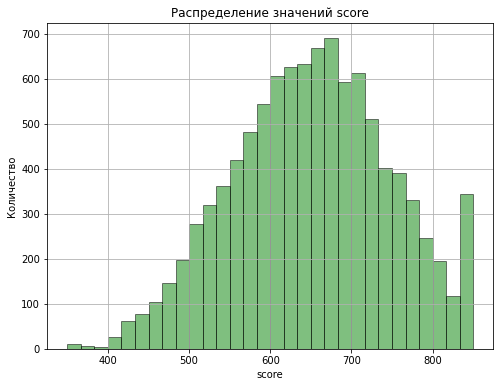

Статистическая информация по: score
count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: score, dtype: float64




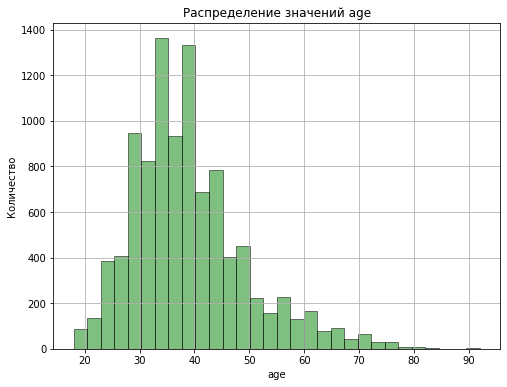

Статистическая информация по: age
count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64




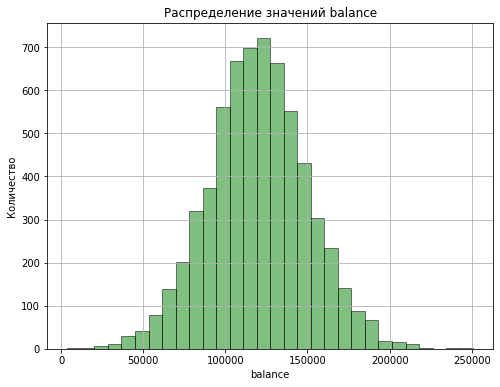

Статистическая информация по: balance
count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64




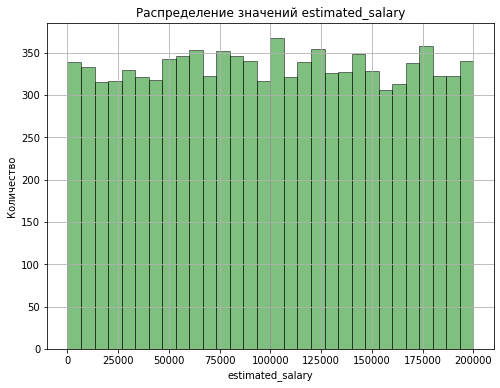

Статистическая информация по: estimated_salary
count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64




In [7]:
# Список количественных переменных
quantitative_variables = ['score', 'age', 'balance', 'estimated_salary']

for variable in quantitative_variables:
    # Проверка на наличие ненулевых значений в столбце
    if df[variable].dropna().shape[0] > 0:  
        # Построение гистограммы
        plt.figure(figsize=(8, 6))
        plt.hist(df[variable].dropna(), bins=30, alpha=0.5, color='g', edgecolor='black')
        plt.title('Распределение значений ' + variable)
        plt.xlabel(variable)
        plt.ylabel('Количество')
        plt.grid(True)
        plt.show()
        
        # Вывод статистической информации
        print('Статистическая информация по:', variable)
        print(df[variable].describe())
        print('\n')

**Вывод:**

- Score (баллы кредитного скоринга): Баллы кредитного скоринга варьируются от 350 до 850. Среднее значение составляет 650.53, что говорит о том, что большинство клиентов имеют достаточно высокий кредитный рейтинг.


- Age (возраст): Возраст клиентов варьируется от 18 до 92 лет. Средний возраст клиентов составляет около 39 лет, что говорит о том, что большинство клиентов банка - это люди среднего возраста.


- Balance (баланс на счете): Значения баланса варьируются от 3768.69 до 250898.09. Средний баланс на счете составляет около 119827.49. Однако, следует отметить, что эти данные присутствуют только для 6383 клиентов из 10000. Нужно решить, что делать с отсутствующими значениями в этом столбце.


- Estimated_salary (прогнозируемая зарплата): Зарплата варьируется от 11.58 до 199992.48. Средняя зарплата клиентов составляет около 100090.24. Это очень большой разброс, поэтому возможно, в данных есть выбросы или аномалии, которые могут исказить анализ.

### Работа с пропусками

Для проверки данных на MAR (Missing At Random), мы сравним распределение других переменных между строками, где "balance" имеет пропуски, и строками, где значения "balance" присутствуют

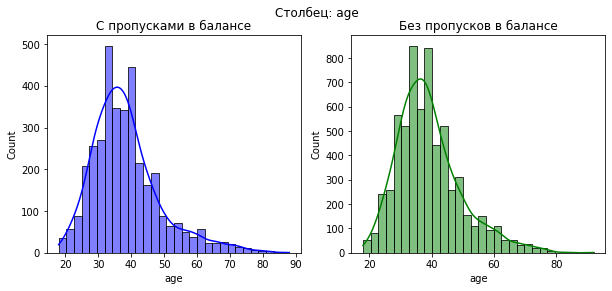

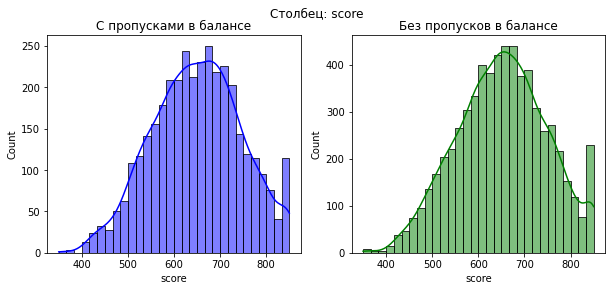

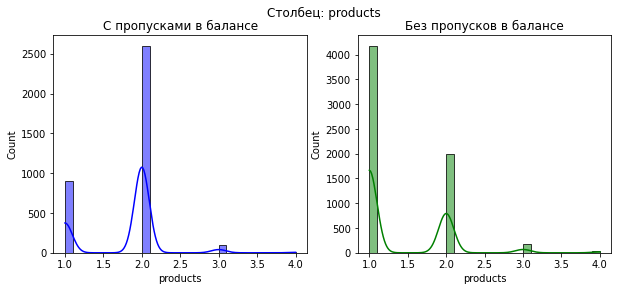

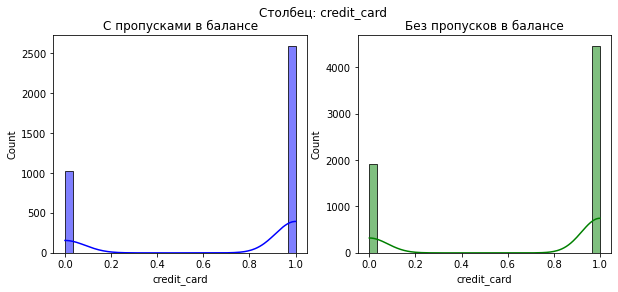

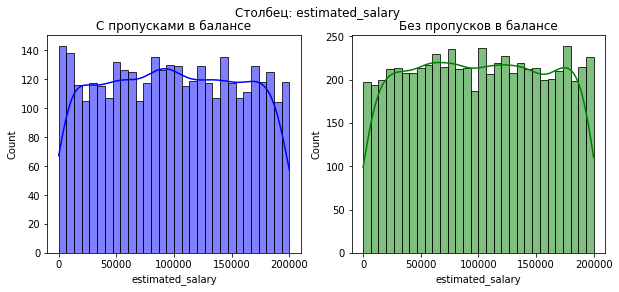

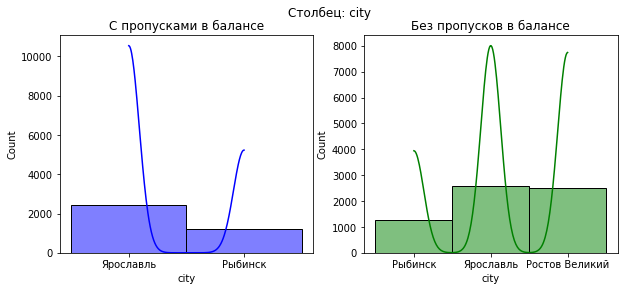

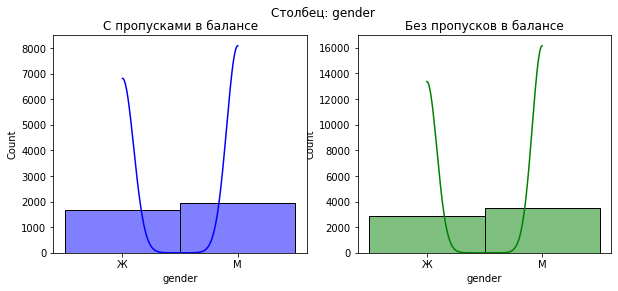

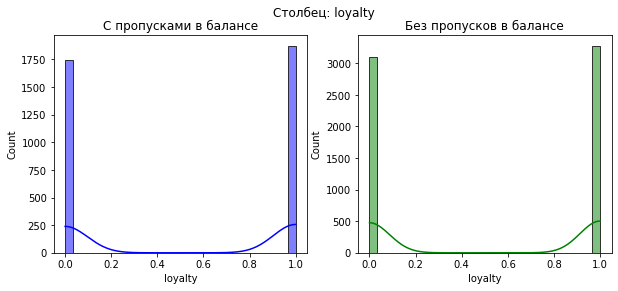

city       gender  loyalty
Рыбинск    Ж       0          270
                   1          275
           М       0          316
                   1          338
Ярославль  Ж       0          535
                   1          574
           М       0          623
                   1          686
dtype: int64

In [8]:
df_missing = df[df['balance'].isnull()]
df_not_missing = df[df['balance'].notnull()]

# Графический анализ для сравнения распределений и проверки пропусков
variables_to_compare = ['age', 'score', 'products', 'credit_card', 'estimated_salary', 'city', 'gender', 'loyalty']


for var in variables_to_compare:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 2)
    sns.histplot(df_not_missing[var], bins=30, color='green', kde=True)
    plt.title('Без пропусков в балансе')

    plt.subplot(1, 2, 1)
    sns.histplot(df_missing[var], bins=30, color='blue', kde=True)
    plt.title('С пропусками в балансе')

    plt.suptitle('Столбец: ' + var)
    plt.show()
    
missing_grouped = df[df['balance'].isnull()].groupby(['city', 'gender', 'loyalty']).size()

# Вывод результатов
missing_grouped

**Вывод:**

Визуальный анализ указывает на различия распределений только по столбцу `products`.
Люди с пропусками в балансе в большей степени пользуются двумя продуктами банка (около 2500 юзеров).
Ниже подробнее рассмотрим статистические данные по пропускам в этом разрезе.


Группировка данных по столбцам 'city', 'gender' и 'loyalty' позволяет увидеть количество пропусков для каждого сочетания значений этих столбцов.

Ниже приведены результаты анализа пропусков в столбце 'balance':


- В городе Рыбинск:

Для женщин (gender=Ж):
270 пропусков для клиентов, не являющихся активными (loyalty=0).
275 пропусков для клиентов, являющихся активными (loyalty=1).
Для мужчин (gender=М):
316 пропусков для клиентов, не являющихся активными (loyalty=0).
338 пропусков для клиентов, являющихся активными (loyalty=1).


- В городе Ярославль:

Для женщин (gender=Ж):
535 пропусков для клиентов, не являющихся активными (loyalty=0).
574 пропусков для клиентов, являющихся активными (loyalty=1).
Для мужчин (gender=М):
623 пропуска для клиентов, не являющихся активными (loyalty=0).
686 пропусков для клиентов, являющихся активными (loyalty=1).


- В городе Ростов великий нет клиентов с пропусками в балансе. 

In [9]:
# Получение статистической информации для 'products' в обоих датасетах
print("Статистическая информация для 'products', где баланс пропущен:")
print(df_missing['products'].describe())

print("\nСтатистическая информация для 'products', где баланс не пропущен:")
print(df_not_missing['products'].describe())

# Получение количества клиентов в каждой группе 'products' в зависимости от наличия пропущенных значений баланса
print("\nКоличество клиентов в каждой группе 'products', где баланс пропущен:")
print(df_missing['products'].value_counts())

print("\nКоличество клиентов в каждой группе 'products', где баланс не пропущен:")
print(df_not_missing['products'].value_counts())

Статистическая информация для 'products', где баланс пропущен:
count    3617.000000
mean        1.784628
std         0.496455
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: products, dtype: float64

Статистическая информация для 'products', где баланс не пропущен:
count    6383.000000
mean        1.386025
std         0.577011
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: products, dtype: float64

Количество клиентов в каждой группе 'products', где баланс пропущен:
2    2600
1     905
3      98
4      14
Name: products, dtype: int64

Количество клиентов в каждой группе 'products', где баланс не пропущен:
1    4179
2    1990
3     168
4      46
Name: products, dtype: int64


**Вывод:**

- Количество клиентов, использующих продукты, в случае отсутствия пропусков в балансе, сосредоточено вокруг значения 1 (среднее значение 1.39, медиана 1). В случае пропусков в балансе, количество используемых продуктов более равномерно распределено между 1 и 2 (среднее значение 1.78, медиана 2).


- Распределение количества продуктов, которыми пользуются клиенты, различается для случаев с пропущенными и не пропущенными балансами. Например, в случае пропусков в балансе, большинство клиентов используют 2 продукта, тогда как при отсутствии пропусков большинство клиентов используют только 1 продукт.

Эти различия могут указывать на некоторую зависимость между количеством используемых продуктов и пропущенными значениями баланса. 


**Вывод по разделу:**

Заполнение пропусков в данных может внести искажения, особенно если нет ясного способа предсказать отсутствующие значения. Вместо заполнения пропусков, может быть более целесообразно учесть их при анализе данных, например, проводя сравнительный анализ для пользователей с известным балансом и без него. 

### Добавление столбцов с кодировкой

#### Города

In [10]:
# Создаем столбцы с кодировкой городов
df_dummies = pd.get_dummies(df['city'], prefix='город')

# Добавляем новые столбцы к исходному датафрейму
df = pd.concat([df, df_dummies], axis=1)
# Проверяем
display(df.sample(10))

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,город_Ростов Великий,город_Рыбинск,город_Ярославль
9058,15845296,470,Рыбинск,Ж,48,6,140576.11,1,1,1,116971.05,0,0,1,0
5334,15856417,786,Ростов Великий,М,24,2,120135.55,2,1,1,125449.47,0,1,0,0
9326,15644523,641,Ростов Великий,М,35,2,103711.56,1,0,1,192464.21,1,1,0,0
8912,15680090,623,Ярославль,Ж,24,7,148167.83,2,1,1,109470.34,0,0,0,1
3183,15776897,636,Ярославль,М,43,6,NaN,2,1,0,43128.95,0,0,0,1
2836,15811191,679,Ярославль,М,60,8,NaN,2,1,1,51380.90,0,0,0,1
4807,15795984,611,Ярославль,М,28,2,NaN,2,0,0,25395.83,0,0,0,1
3024,15653537,648,Ростов Великий,М,41,5,123049.21,1,0,1,5066.76,0,1,0,0
1815,15626235,510,Ярославль,М,32,9,103324.78,1,1,1,46127.70,0,0,0,1
3495,15829897,591,Ростов Великий,М,46,4,129269.27,1,1,0,163504.33,0,1,0,0


#### Пол

In [11]:
# Создаем столбцы с кодировкой пола
df_gender = pd.get_dummies(df['gender'], prefix='пол')

# Добавляем новые столбцы к исходному датафрейму
df = pd.concat([df, df_gender], axis=1)

# Проверяем
display(df.sample(10))

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,город_Ростов Великий,город_Рыбинск,город_Ярославль,пол_Ж,пол_М
4666,15734611,850,Ростов Великий,Ж,39,5,114491.82,1,1,0,99689.48,0,1,0,0,1,0
3227,15682312,691,Ярославль,М,26,9,136623.19,1,1,0,153228.00,0,0,0,1,0,1
2292,15821800,677,Ярославль,М,27,2,NaN,2,1,1,20092.89,0,0,0,1,0,1
4447,15759117,666,Ростов Великий,Ж,50,7,109062.28,1,1,1,140136.10,1,1,0,0,1,0
8772,15634859,768,Ярославль,М,30,6,NaN,2,1,1,199454.37,0,0,0,1,0,1
4742,15804870,506,Ростов Великий,М,59,8,119152.10,2,1,1,170679.74,0,1,0,0,0,1
9849,15818947,678,Ярославль,Ж,34,6,NaN,2,1,1,124592.84,0,0,0,1,1,0
3253,15649208,585,Ярославль,Ж,38,5,NaN,1,1,1,87363.56,0,0,0,1,1,0
7395,15851122,721,Ростов Великий,Ж,45,7,138523.20,1,0,0,59604.45,1,1,0,0,1,0
6755,15726219,812,Рыбинск,М,38,3,127117.80,2,1,1,174822.74,0,0,1,0,0,1


## Исследовательский анализ данных

### Средние значения и стандартное отклонение в данных

In [12]:
df.describe().drop('user_id', axis=1).round(2).T

,count,mean,std,min,25%,50%,75%,max
score,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
objects,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
balance,6383.0,119827.49,30095.06,3768.69,100181.98,119839.69,139512.29,250898.09
products,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
credit_card,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
loyalty,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48
churn,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00
город_Ростов Великий,10000.0,0.25,0.43,0.00,0.00,0.00,1.00,1.00


**Вывод:**

- Score (баллы кредитного скоринга): Средний балл скоринга составляет 650.53. В то время как минимальное значение - 350, максимальное - 850. Это указывает на то, что большинство клиентов имеют достаточно хороший кредитный рейтинг.


- Age (возраст): Средний возраст клиентов - примерно 39 лет. Возраст клиентов варьируется от 18 до 92 лет, при этом большинство клиентов в возрасте от 32 до 44 лет.


- Balance (баланс на счете): Средний баланс на счете составляет 119827.49. Однако, следует отметить, что эти данные присутствуют только для 6383 клиентов из 10000.


- Estimated_salary (оценочная зарплата): Средняя оценочная зарплата клиентов составляет 100090.24, при этом зарплаты клиентов варьируются от очень низкой (11.58) до высокой (199992.48).


- City (город): Большинство клиентов (50%) находятся в Ярославле. 25% клиентов находятся в Ростове Великом и остальные 25% - в Рыбинске.


- Gender (пол): Среди клиентов банка больше мужчин (55%) по сравнению с женщинами (45%).


- Objects (количество объектов в собственности): Количество объектов в собственности варьируется от 0 до 10. Среднее значение равно 5, что говорит о том, что в среднем у клиента 5 объектов в собственности.


- Products (количество продуктов, которыми пользуется клиент): Среднее количество продуктов, которыми пользуется клиент, равно 1.53. Большинство клиентов пользуются 1 или 2 продуктами банка.


- CreditCard (наличие кредитной карты): В среднем, 71% клиентов имеют кредитную карту.


- Loyalty (активный клиент): В среднем, 52% клиентов являются активными. Это демонстрирует примерно равное распределение между активными и неактивными клиентами.


- Churn (ушёл клиент или нет): Среднее значение составляет 0.2, что означает, что 20% клиентов ушли. Это может указывать на потенциальные проблемы с удержанием клиентов, которые могут требовать дополнительного анализа.

### Проверка средних значений признаков по группам ушедших и оставшихся клиентов

In [29]:
# Группировка данных и расчет средних значений
mean_values = df.drop('user_id', axis=1).groupby('churn').agg('mean').round(1)

# Вычисление процентной разницы и округление до одного десятичного знака
percentage_difference = (((mean_values.iloc[1] - mean_values.iloc[0]) / mean_values.iloc[0]) * 100).round(1)

# Добавление результата в таблицу
mean_values = mean_values.append(percentage_difference, ignore_index=True)

# Изменение индекса для новой строки
mean_values = mean_values.rename(index={2: 'Разница в процентах (%)'})

# Транспонирование таблицы для лучшего отображения
mean_values = mean_values.T
mean_values.columns = ['Не отточные', 'Отточные', 'Разница в процентах (%)']

# Вывод результата
mean_values


,Не отточные,Отточные,Разница в процентах (%)
score,651.9,645.4,-1.0
age,37.4,44.8,19.8
objects,5.0,4.9,-2.0
balance,119535.9,120747.0,1.0
products,1.5,1.5,0.0
credit_card,0.7,0.7,0.0
loyalty,0.6,0.4,-33.3
estimated_salary,99738.4,101465.7,1.7
город_Ростов Великий,0.2,0.4,100.0
город_Рыбинск,0.3,0.2,-33.3


In [32]:
df.groupby('city').agg({'churn':'mean'}).round(2)


,churn
city,
Ростов Великий,0.32
Рыбинск,0.17
Ярославль,0.16


**Вывод:**


- В категории кредитного скоринга наблюдается незначительное различие между теми, кто остался клиентом банка, и теми, кто его покинул. Однако, гендерный состав двух групп заметно отличается. В группе оставшихся клиентов преобладают мужчины (57%), тогда как среди ушедших в отток - женщины (44%). Это может указывать на то, что пол клиента влияет на вероятность его ухода.


- Рассматривая возраст клиентов, мы видим, что средний возраст тех, кто покинул банк, на 7 лет больше, чем у оставшихся. Это важный индикатор, который подчеркивает значимость возрастного фактора при анализе оттока.


- Оба типа клиентов в среднем владеют пятью объектами и имеют близкие балансы на своих счетах, что делает эти признаки менее информативными для нашего анализа.


- Однако, стоит отметить, что среди активных клиентов больше тех, кто остался (55% против 35% ушедших). Это подчеркивает важность уровня активности клиента в контексте его возможного ухода.


- В отношении заработной платы среди оставшихся и ушедших клиентов разница незначительна, но есть тенденция к тому, что клиенты с более высокими зарплатами чаще покидают банк. Этот момент требует дополнительного изучения.


- Наконец, отток клиентов сильно варьируется в зависимости от города: в Ростове Великом уровень оттока в два раза выше, чем в Рыбинске и Ярославле. Это важный географический аспект, который следует учесть при дальнейшем анализе.

### Визуализация значений признаков в разбивке по двум группам - отточных и оставшихся клиентов

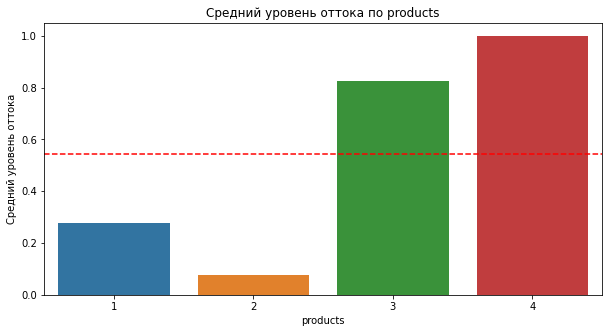

   products  count      mean
0         1   5084  0.277144
1         2   4590  0.075817
2         3    266  0.827068
3         4     60  1.000000


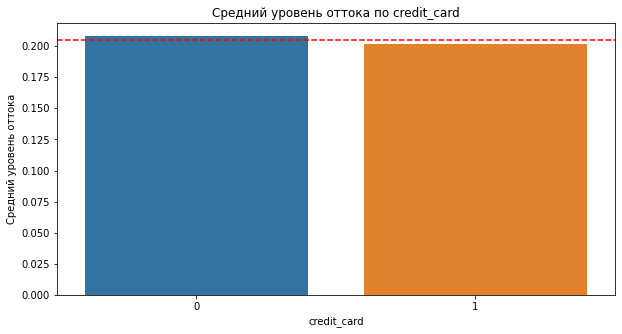

   credit_card  count      mean
0            0   2945  0.208149
1            1   7055  0.201843


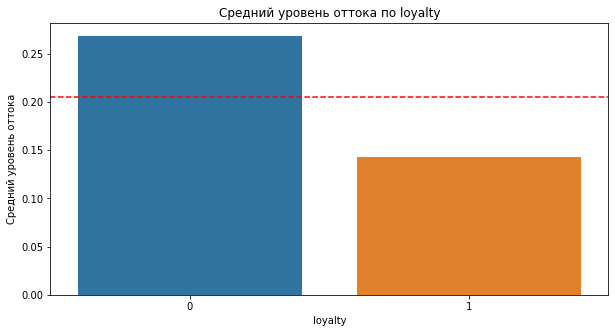

   loyalty  count      mean
0        0   4849  0.268509
1        1   5151  0.142691


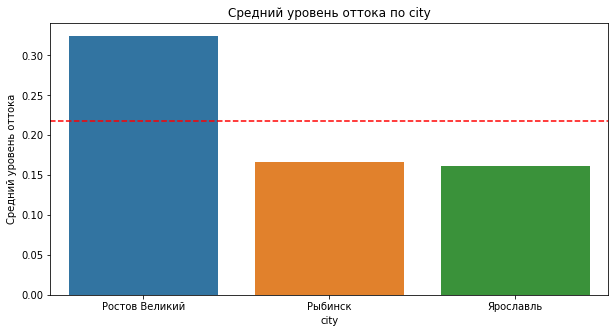

             city  count      mean
0  Ростов Великий   2509  0.324432
1         Рыбинск   2477  0.166734
2       Ярославль   5014  0.161548


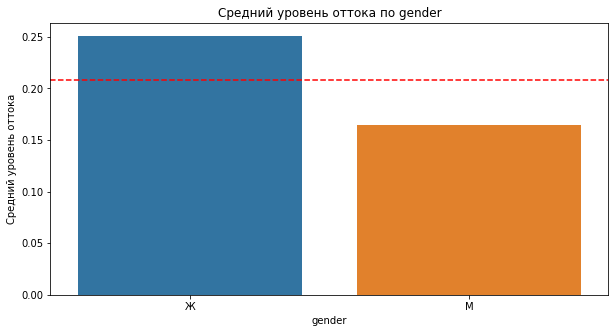

  gender  count      mean
0      Ж   4543  0.250715
1      М   5457  0.164559


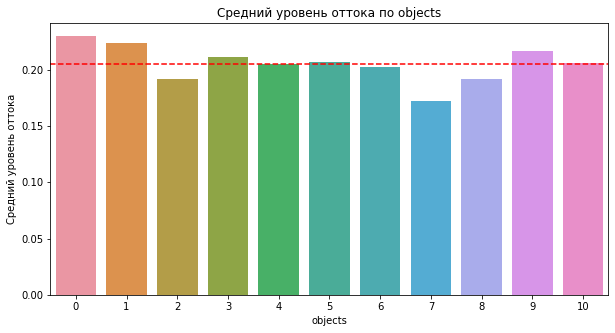

    objects  count      mean
0         0    413  0.230024
1         1   1035  0.224155
2         2   1048  0.191794
3         3   1009  0.211100
4         4    989  0.205258
5         5   1012  0.206522
6         6    967  0.202689
7         7   1028  0.172179
8         8   1025  0.192195
9         9    984  0.216463
10       10    490  0.206122


In [15]:
categorical_columns = ['products', 'credit_card', 'loyalty', 'city', 'gender', 'objects']

for col in categorical_columns:
    churn_means = df.groupby(col)['churn'].mean().reset_index()
    
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(x=col, y='churn', data=churn_means, ax=ax)
    ax.axhline(churn_means['churn'].mean(), color='red', linestyle='--')
    ax.set_title(f'Средний уровень оттока по {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Средний уровень оттока')
    plt.show()

    # Вывод сводной таблицы
    print(df.groupby(col)['churn'].agg(['count', 'mean']).reset_index())

**Вывод:**


- Products: Видно, что клиенты с 4 продуктами полностью ушли в отток, клиенты с 3 продуктами также показывают высокий уровень оттока (82,7%), а у клиентов с 1 или 2 продуктами уровень оттока значительно меньше (27,7% и 7,6% соответственно). Это может указывать на то, что клиенты, которые используют больше продуктов, могут столкнуться с проблемами управления этими продуктами или быть недовольными некоторыми из них.


- Credit Card: Уровень оттока клиентов с кредитной картой и без нее почти одинаков (20,8% и 20,1% соответственно). Это позволяет предположить, что наличие кредитной карты не оказывает значительного влияния на вероятность оттока.


- Loyalty: Среди лояльных клиентов уровень оттока значительно ниже (14,2% против 26,9% у не лояльных клиентов). Это довольно очевидный результат, который подтверждает важность программ лояльности.


- City: В Ростове Великом наблюдается наибольший уровень оттока (32,4%), в то время как в Рыбинске и Ярославле уровень оттока существенно ниже (16,7% и 16,2% соответственно). 


- Gender: Среди женщин уровень оттока выше, чем среди мужчин (25,1% против 16,5%). Это может указывать на то, что банк может не удовлетворять некоторые специфические потребности женской аудитории.


- Objects: Уровень оттока практически одинаков для клиентов, имеющих от 0 до 6 объектов (от 20,2% до 23%), однако он снижается до 17,2% для тех, у кого 7 объектов, и затем снова возрастает. Данный признак требует дальнейшего исследования.

        score     churn  above_average_churn
0    (0, 100]       NaN                False
1  (100, 200]       NaN                False
2  (200, 300]       NaN                False
3  (300, 400]  1.000000                 True
4  (400, 500]  0.213141                 True
5  (500, 600]  0.211721                 True
6  (600, 700]  0.197224                False
7  (700, 800]  0.199110                False
8  (800, 900]  0.196899                False
Сводная таблица и статистические показатели для score:

             mean median         std
            score  score       score
churn                               
0      651.853196    653   95.653837
1      645.351497    646  100.321503 


        age     churn  above_average_churn
0   (0, 10]       NaN                False
1  (10, 20]  0.056180                False
2  (20, 30]  0.076104                False
3  (30, 40]  0.120872                False
4  (40, 50]  0.339655                 True
5  (50, 60]  0.562108                 True
6  (6

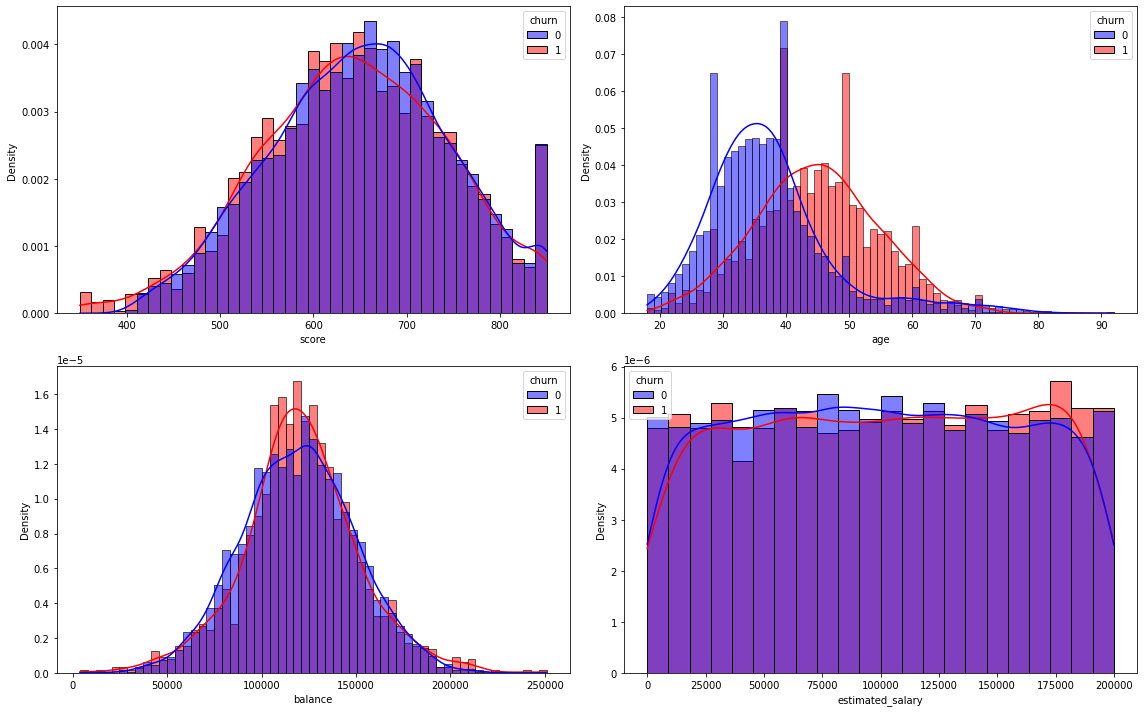

In [16]:
# Непрерывные переменные для анализа
continuous_columns = ['score', 'age', 'balance', 'estimated_salary']


# Создаем фигуру и оси для построения графиков
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# Рассчитаем среднее значение оттока для банка
average_churn = df['churn'].mean()

# Обрабатываем каждый столбец
for ax, column in zip(axes.flatten(), continuous_columns):

    # Гистограмма для всех клиентов с различным оттоком
    sns.histplot(df, x=column, hue='churn', palette=['blue', 'red'], stat='density', common_norm=False, kde=True, ax=ax)
    
    ax.set_xlabel(column)

    # Создаем сводную таблицу
    if column == 'score':
        bins = np.arange(0, 1000, 100)
    elif column == 'age':
        bins = np.arange(0, 100, 10)
    elif column == 'balance':
        bins = np.arange(0, 300000, 25000)
    elif column == 'estimated_salary':
        bins = np.arange(0, 250000, 20000)

    pivot_table = df.groupby(pd.cut(df[column], bins))['churn'].mean().reset_index()

    # Указываем, когда отточность выше, чем в среднем по банку
    pivot_table['above_average_churn'] = pivot_table['churn'] > average_churn

    print(pivot_table)
    
    pivot = df.pivot_table(index='churn', values=column, aggfunc=['mean', 'median', 'std'])
    print(f"Сводная таблица и статистические показатели для {column}:\n")
    print(pivot, "\n\n")

plt.tight_layout()
plt.show()


**Вывод:**

Исходя из данных и графиков, можно сделать следующие выводы:

- Credit Score: Клиенты с очень низким кредитным рейтингом (менее 400) имеют очень высокую вероятность ухода. Отметим, что большинство клиентов имеют кредитный рейтинг от 400 до 900, и в этом диапазоне вероятность ухода немного снижается с увеличением рейтинга.


- Возраст: Видим, что молодые люди (возрастом до 40 лет) склонны оставаться с банком, в то время как вероятность ухода заметно увеличивается среди клиентов от 40 до 60 лет. Затем после 60 лет вероятность ухода начинает снижаться.


- Баланс: Клиенты с балансом от 0 до 75000 имеют значительно более высокую вероятность ухода по сравнению со средним уровнем банка. Однако наблюдается исключение для тех, у кого баланс превышает 200000, тут вероятность ухода существенно возрастает, возможно, это связано с небольшим количеством таких клиентов.


- Оценочная зарплата: Вероятность ухода не сильно варьируется в зависимости от оцененной зарплаты. Мы видим небольшое увеличение вероятности ухода для клиентов с оцененной зарплатой от 60000 до 200000.

### Анализ корреляций

Значительные особенности:
 age                     0.285323
loyalty                -0.156128
churn                   1.000000
город_Ростов Великий    0.173488
город_Ярославль        -0.104955
пол_Ж                   0.106512
пол_М                  -0.106512
Name: churn, dtype: float64


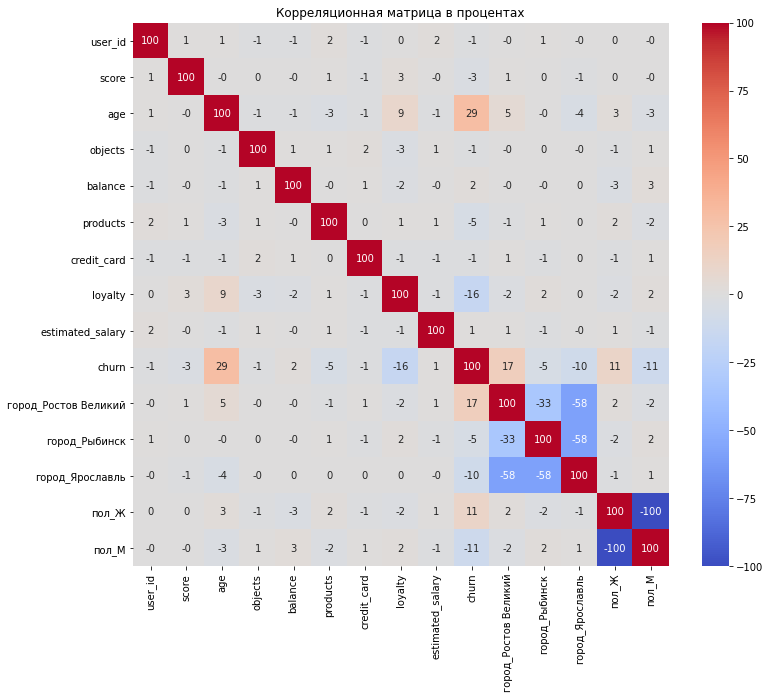


Описание корреляций с помощью шкалы Чеддока:
 user_id                  Очень слабая
score                    Очень слабая
age                            Слабая
objects                  Очень слабая
balance                  Очень слабая
products                 Очень слабая
credit_card              Очень слабая
loyalty                  Очень слабая
estimated_salary         Очень слабая
churn                   Очень сильная
город_Ростов Великий     Очень слабая
город_Рыбинск            Очень слабая
город_Ярославль          Очень слабая
пол_Ж                    Очень слабая
пол_М                    Очень слабая
Name: churn, dtype: object
interval columns not set, guessing: ['user_id', 'score', 'age', 'objects', 'balance', 'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn', 'город_Ростов Великий', 'город_Рыбинск', 'город_Ярославль', 'пол_Ж', 'пол_М']


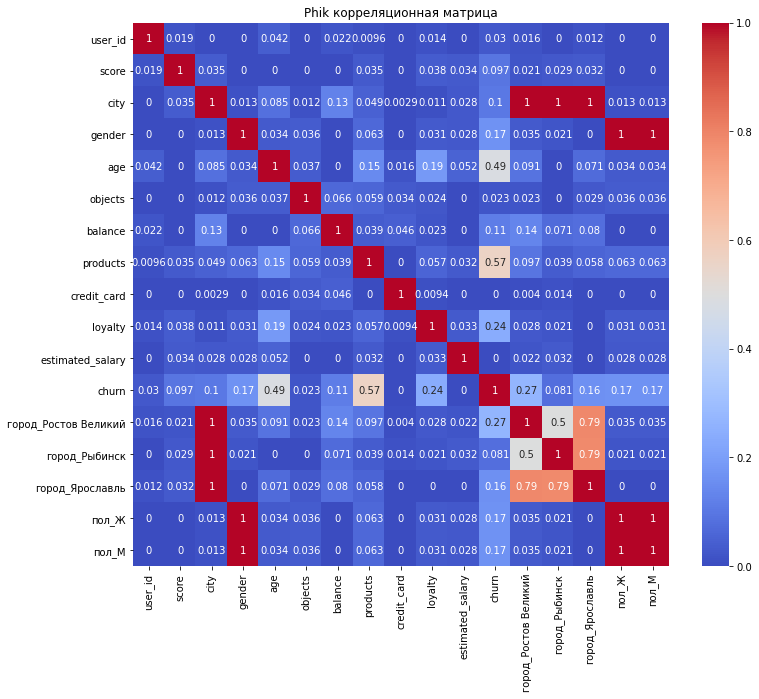

In [17]:
# Анализ зависимостей между характеристиками и целевой переменной
correlation = df.corr()

# Найдем характеристики, которые коррелируют с целевой переменной более чем на 10%
significant_features = correlation[abs(correlation['churn']) > 0.10]['churn']
print("Значительные особенности:\n", significant_features)

# Подготовим корреляционную матрицу для визуализации
correlation_percent = correlation.applymap(lambda x: round(x*100, 0))

# Визуализируем корреляционную матрицу
plt.figure(figsize=(12,10))
sns.heatmap(correlation_percent, annot=True, cmap='coolwarm', center=0, fmt='g')
plt.title('Корреляционная матрица в процентах')
plt.show()

# Описание корреляций с помощью шкалы Чеддока
def chedhok_scale(val):
    val = abs(val)
    if val == 0:
        return 'Корреляции нет'
    elif val < 0.2:
        return 'Очень слабая'
    elif val < 0.4:
        return 'Слабая'
    elif val < 0.6:
        return 'Умеренная'
    elif val < 0.8:
        return 'Сильная'
    else:
        return 'Очень сильная'

correlation_description = correlation['churn'].apply(chedhok_scale)
print("\nОписание корреляций с помощью шкалы Чеддока:\n", correlation_description)

# Применение матрицы корреляции phik для нелинейных зависимостей
phik_correlation = df.phik_matrix()
plt.figure(figsize=(12,10))
sns.heatmap(phik_correlation, annot=True, cmap='coolwarm')
plt.title('Phik корреляционная матрица')
plt.show()

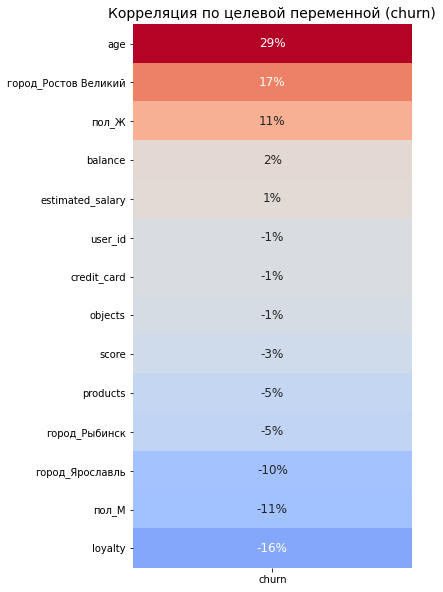

,churn
age,0.285323
город_Ростов Великий,0.173488
пол_Ж,0.106512
balance,0.017208
estimated_salary,0.012097
user_id,-0.006248
credit_card,-0.007138
objects,-0.014001
score,-0.027094
products,-0.047820


In [34]:
# Подготовим корреляционную матрицу только для целевой переменной
target_correlation = correlation[['churn']].drop(['churn'])

# Сортировка по величине корреляции
sorted_target_correlation = target_correlation.sort_values(by='churn', ascending=False)

# Визуализируем отсортированную корреляционную матрицу
plt.figure(figsize=(5,10))
sns.heatmap(sorted_target_correlation, annot=True, cmap='coolwarm', center=0, fmt='.0%', cbar=False, annot_kws={"size": 12})
plt.title('Корреляция по целевой переменной (churn)', fontsize=14)
plt.show()
target_correlation.sort_values(by='churn', ascending = False)

**Вывод:**

- Корреляционный анализ и Phik_correlation:

Возраст клиента имеет положительную корреляцию с оттоком (0.285323).
С другой стороны, переменная "loyalty" имеет отрицательную корреляцию с оттоком (-0.156128), что подтверждает наше предположение, что более лояльные клиенты менее склонны уходить.
Phik корреляция показывает более высокие значения по сравнению с обычной корреляцией, особенно заметна сильная связь оттока с возрастом, количеством продуктов и городом проживания.

**На основании полученных данных можно сделать следующие выводы:**

- Города и пол клиентов:

    - Клиенты из Ростова Великого имеют значительно большую вероятность уйти из банка, чем клиенты из других городов. Отток клиентов в Ростове Великом составляет около 32.4%, что гораздо выше, чем в Рыбинске (16.7%) или Ярославле (16.1%).
    - Женщины более склонны к оттоку, чем мужчины. Доля оттока среди женщин составляет 25.1%, в то время как среди мужчин - 16.5%.


- Количество продуктов, кредитная карта и лояльность:

    - Количество продуктов, которыми пользуются клиенты, также влияет на отток. Причем клиенты, использующие 3 или 4 продукта, имеют высокий уровень оттока.
    - Наличие кредитной карты не имеет значительного влияния на вероятность оттока клиента. Однако, активные клиенты (те, у кого высокий показатель лояльности) склонны уходить реже.
   
   
- Корреляционный анализ и Phik_correlation:

    - Возраст клиента имеет положительную корреляцию с оттоком (0.285323). Это может означать, что старшие клиенты склонны уходить чаще, чем молодые.
    - С другой стороны, переменная "loyalty" имеет отрицательную корреляцию с оттоком (-0.156128), что подтверждает наше предположение, что более лояльные клиенты менее склонны уходить.
    - Phik корреляция показывает более высокие значения по сравнению с обычной корреляцией, особенно заметна сильная связь оттока с возрастом, количеством продуктов и городом проживания.

### Вывод по разделу



- Возраст между 40 и 60: Средний отток в этой группе составляет около 39%, что выше, чем средний показатель по всему банку.


- Используют 3 или 4 продукта: Отток в этой группе составляет около 86%, что намного выше среднего показателя. Это может указывать на то, что клиенты, использующие больше продуктов, склонны к оттоку, возможно, из-за сложностей в управлении несколькими продуктами или недовольства одним или несколькими из них.


- Проживают в Ростове Великом: Средний уровень оттока в этом городе составляет около 32%, что также выше, чем средний показатель по банку.


- Пол мужской: Мужчины показывают меньший отток (около 16%), чем женщины (около 25%).


- Кредитный скоринг от 400 до 600: Уровень оттока в этой группе (около 21%) близок к среднему уровню по банку.


- Баланс больше 200000: Эта группа имеет очень высокий уровень оттока - около 56%, что указывает на то, что клиенты с высоким балансом склонны к оттоку. Это может быть связано с тем, что эти клиенты могут найти более привлекательные условия в других банках.


- Неактивные клиенты: Как и ожидалось, неактивные клиенты имеют более высокий уровень оттока (около 27%) по сравнению со средним показателем по банку.

## Проверка статистических гипотез

Мы проверяем статистическую гипотезу о различии дохода между клиентами, которые ушли, и теми, кто остался. Будем использовать оба теста: t-тест Стьюдента и U-тест Манна-Уитни. Т-тест используется, когда данные распределены нормально, в то время как U-тест является непараметрическим тестом и может использоваться, когда нет уверенности в нормальности данных.

### Первая гипотеза

**- Нулевая гипотеза (H0):** Распределения доходов среди клиентов, которые ушли, и тех, кто остался, одинаковы.


**- Альтернативная гипотеза (H1):** Распределения доходов среди клиентов, которые ушли, и тех, кто остался, отличаются.

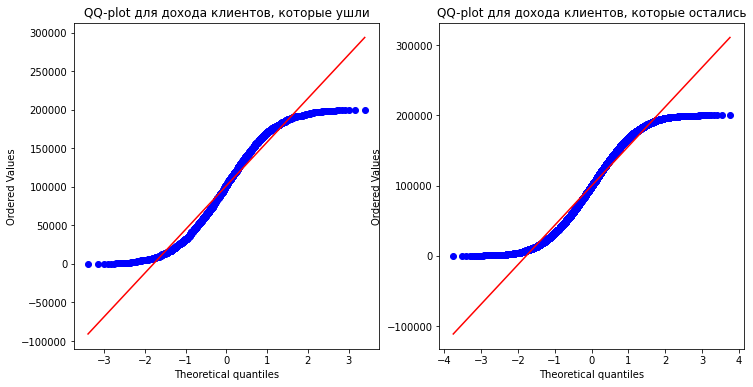

Результаты t-теста Стьюдента:
Статистика: 1.2, p-value: 0.23
Не можем отвергнуть нулевую гипотезу для t-теста Стьюдента

Результаты U-теста Манна-Уитни:
Статистика: 8250768.0, p-value: 0.23
Не можем отвергнуть нулевую гипотезу для U-теста Манна-Уитни


In [35]:
# Разделение данных
left = df[df['churn'] == 1]['estimated_salary']
stayed = df[df['churn'] == 0]['estimated_salary']

# Проверка на нормальность с помощью QQ-plot
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
stats.probplot(left, dist="norm", plot=plt)
plt.title('QQ-plot для дохода клиентов, которые ушли')

plt.subplot(1, 2, 2)
stats.probplot(stayed, dist="norm", plot=plt)
plt.title('QQ-plot для дохода клиентов, которые остались')
plt.show()

# T-тест Стьюдента
t_stat, t_p_val = stats.ttest_ind(left, stayed, equal_var = False)
print(f'Результаты t-теста Стьюдента:\nСтатистика: {round(t_stat, 2)}, p-value: {round(t_p_val, 2)}')
if t_p_val < 0.05:
    print("Отвергаем нулевую гипотезу для t-теста Стьюдента")
else:
    print("Не можем отвергнуть нулевую гипотезу для t-теста Стьюдента")

# U-тест Манна-Уитни
u_stat, u_p_val = stats.mannwhitneyu(left, stayed)
print(f'\nРезультаты U-теста Манна-Уитни:\nСтатистика: {round(u_stat, 2)}, p-value: {round(u_p_val, 2)}')
if u_p_val < 0.05:
    print("Отвергаем нулевую гипотезу для U-теста Манна-Уитни")
else:
    print("Не можем отвергнуть нулевую гипотезу для U-теста Манна-Уитни")


**Вывод**

- По результатам как t-теста Стьюдента, так и U-теста Манна-Уитни, мы не можем отвергнуть нулевую гипотезу. Это означает, что у нас нет достаточных доказательств для утверждения, что есть статистически значимые различия в доходах между клиентами, которые остались, и клиентами, которые ушли.


- Наш p-value больше общепринятого порогового значения 0.05, что указывает на то, что вероятность получить такие или еще более выраженные различия при верности нулевой гипотезы достаточно высока.

В связи с этим, мы не можем утверждать, что доход клиента влияет на его решение об уходе из банка. Это важная информация для банка, поскольку она позволяет пересмотреть стратегию удержания клиентов, учитывая, что доходы клиентов, скорее всего, не играют значительной роли в решении об уходе.

### Вторая гипотеза

Проверим гипотезу о том, влияет ли географическое местоположение на отток клиентов.

**Нулевая гипотеза (H0):** Распределение оттока клиентов между различными географическими регионами одинаково.

**Альтернативная гипотеза (H1):** Распределение оттока клиентов между различными географическими регионами различно.

In [37]:
# Подсчет количества ушедших и оставшихся клиентов в каждом регионе
crosstab = pd.crosstab(df['city'], df['churn'])

# Применение chi-square теста
chi2, p, dof, expected = chi2_contingency(crosstab)

print(f'Результаты chi-square теста:\nСтатистика: {chi2}, p-value: {p}')
if p < 0.05:
    print("Отвергаем нулевую гипотезу для chi-square теста")
else:
    print("Не можем отвергнуть нулевую гипотезу для chi-square теста")

Результаты chi-square теста:
Статистика: 301.25533682434536, p-value: 3.8303176053541544e-66
Отвергаем нулевую гипотезу для chi-square теста


**Вывод:**
Результаты теста говорят о том, что распределение оттока клиентов между различными городами значимо отличается. Это означает, что географическое местоположение влияет на отток клиентов.

## Рекомендации по привлечению приоритетных сегментов 

### Выделяем лояльные группы клиентов

Создадим многофакторную сегментацию на основе возраста, активности клиента, баланса на счету и количества используемых продуктов. В качестве метрики ценности сегмента мы можем использовать среднюю заработную плату клиентов в этом сегменте

In [20]:
# Добавляем столбцы для групп возраста и баланса
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['18-29', '30-39', '40-49', '50-59', '60+'])
df['balance_group'] = pd.cut(df['balance'].fillna(0), bins=[-np.inf, 100000, 200000, np.inf], labels=['low', 'medium', 'high'])

# Группируем по возрастной группе, лояльности, группе баланса и количеству продуктов
segmented_df = df.groupby(['age_group', 'loyalty', 'balance_group', 'products']).agg({
    'user_id': 'count',
    'churn': 'mean',
    'estimated_salary': 'mean'
}).reset_index()

# Переименовываем столбцы для ясности
segmented_df.rename(columns={
    'user_id': 'segment_size',
    'churn': 'churn_rate',
    'estimated_salary': 'avg_salary'
}, inplace=True)

# Вычисляем среднюю ценность клиента в сегменте как среднюю заработную плату, умноженную на (1 - уровень оттока)
segmented_df['segment_value'] = segmented_df['avg_salary'] * (1 - segmented_df['churn_rate'])

# Фильтруем по лояльным клиентам
loyal_customer_segments = segmented_df[segmented_df['loyalty'] == 1]

loyal_customer_segments


,age_group,loyalty,balance_group,products,segment_size,churn_rate,avg_salary,segment_value
12,18-29,1,low,1,177,0.045198,101534.630395,96945.494558
13,18-29,1,low,2,366,0.019126,101869.934454,99921.602374
14,18-29,1,low,3,9,0.333333,99066.864444,66044.576296
15,18-29,1,low,4,0,NaN,NaN,NaN
16,18-29,1,medium,1,298,0.070470,102155.182651,94956.327498
17,18-29,1,medium,2,148,0.033784,100168.970473,96784.883633
18,18-29,1,medium,3,5,0.800000,141935.750000,28387.150000
19,18-29,1,medium,4,0,NaN,NaN,NaN
20,18-29,1,high,1,2,1.000000,108070.165000,0.000000
21,18-29,1,high,2,1,1.000000,197297.770000,0.000000


**Вывод:**

Мы хотим сфокусироваться на больших, высокоценных сегментах с низким уровнем оттока. Вот какие сегменты удалось выделить из данных:


- Сегмент "18-29", средний баланс, 2 продукта: Размер этого сегмента 148, а его средняя ценность высока - 96,784. Это относительно молодые люди, использующие два наших продукта, и у них средний баланс, что указывает на умеренный уровень финансовых возможностей.


- Сегмент "30-39", низкий баланс, 2 продукта: Сегмент составляет 721 человек с средней ценностью в 93,959. Это молодые профессионалы, которые могут быть в начале своей карьеры или в процессе перехода к более высокооплачиваемой работе.


- Сегмент "40-49", низкий баланс, 2 продукта: Этот сегмент имеет размер 324 и среднюю ценность в 98,839. Это более взрослые профессионалы, которые могут иметь больший доход и лояльность к банку.


- Сегмент "18-29", низкий баланс, 2 продукта: Размер сегмента составляет 366 с средней ценностью 99,921. Это молодые клиенты, которые активно используют два наших продукта.


- Сегмент "60+", низкий баланс, 2 продукта: Сегмент состоит из 119 человек, средняя ценность 94,574. Это старшие клиенты, которые могут иметь устойчивый доход от пенсий или сбережений.

### Практические рекомендации по привлечению клиентов из выделенных сегментов

Вот некоторые практические рекомендации для привлечения клиентов из этих сегментов:

- Сегмент "18-29", средний баланс, 2 продукта:
    - Ориентироваться на молодых людей через социальные медиа и онлайн-рекламу, подчеркивая преимущества использования двух наших продуктов. Можно предложить специальные скидки или бонусы для молодых клиентов, которые привлекают второй продукт.


- Сегмент "30-39", низкий баланс, 2 продукта:
    - Для более взрослых профессионалов, акцентировать внимание на преимуществах наших продуктов для их конкретных потребностей, таких как семья, образование детей или планирование пенсии. Предложить индивидуализированные консультации или вебинары по финансовому планированию может быть привлекательным.


- Сегмент "40-49", низкий баланс, 2 продукта: 
    - Для старших клиентов удобство и доступность являются ключевыми. Обеспечьте, чтобы наши продукты были легко доступны и понятны, предложите помощь в использовании цифровых каналов или возможность обслуживания на дому.


- Сегмент "18-29", низкий баланс, 2 продукта:
    - Всегда старайтесь минимизировать отток, улучшая уровень обслуживания клиентов и решая проблемы быстро и эффективно. Регулярно собирайте обратную связь от клиентов, чтобы понять их потребности и проблемы.


- Сегмент "60+", низкий баланс, 2 продукта: 
    - Проведите кампании по удержанию для клиентов с высоким риском оттока, предлагая им персонализированные предложения или бонусы за их лояльность.




